## IMPORTING NECCESSARY LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

In [6]:
df = pd.read_csv('coursera/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.shape

(200, 4)

## OUR GIVEN TASK IS TO ESTABLISH THE SIMPLE LINEAR REGRESSION WITH INDEPENDENT VARIABLE 'TV' AND DEPENDENT VARIABLE 'SALES'

In [8]:
#removing radio and newspaper columns
df.drop('Radio', axis = 1, inplace = True)
df.shape

(200, 3)

In [9]:
df.drop('Newspaper', axis = 1, inplace = True)
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


## CREATING A SCATTER PLOT TO SHOW THE RELATIONSHIP BETWEEN TV AND SALES

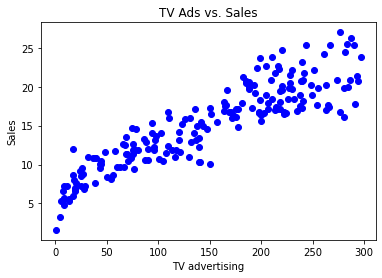

In [13]:
plt.xlabel('TV advertising')
plt.ylabel('Sales')
plt.title('TV Ads vs. Sales')
plt.scatter(df.TV, df.Sales, color = 'blue')
plt.show()

In [ ]:
# From the above graph we can see that our decision to use linear regression holds merit inn this case.

## TO CREATE OUR TRAINING SAMPLE AND OUR TEST SAMPLE, WE'LL SPLIT DF INTO 80%-20% RESPECTIVELY

In [17]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

## CREATING A LINEAR REGRESSION MODEL BASED ON 'TRAIN' DATA

<function matplotlib.pyplot.show(*args, **kw)>

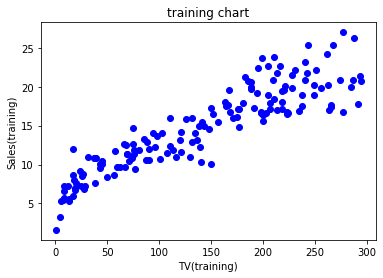

In [19]:
plt.scatter(train.TV, train.Sales, color = 'blue')
plt.xlabel('TV(training)')
plt.ylabel('Sales(training)')
plt.title('training chart')
plt.show

## IMPLEMENTING THE SKLEARN LIBRARY'S "LINEAR_MODEL" TO CREATE A REGRESSION LINE IN OUR TRAINING CHART

In [24]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['TV']])
train_y = np.asanyarray(train[['Sales']])
regr.fit(train_x, train_y)

# We need the coefficients and y intercept of the regression line
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


Coefficients:  [[0.05604997]]
Intercept:  [6.84658639]


In [ ]:
# WE HAVE OUR COEFFICIENT 'THETA' AS WELL AS OUR Y-INTERCEPT NOW

## PLOTTING THE CHART AGAIN, THIS TIME WITH THE REGRESSION LINE

<function matplotlib.pyplot.show(*args, **kw)>

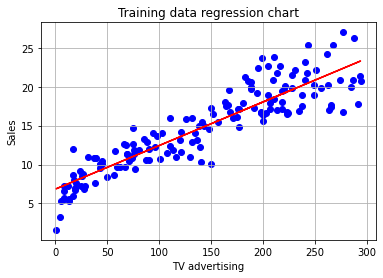

In [27]:
plt.scatter(train.TV, train.Sales, color = 'blue')
# above is the same scatter plot 
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('TV advertising')
plt.ylabel('Sales')
plt.title('Training data regression chart')
plt.grid(True)
plt.show

##  AS FOR OUR EVALUATION METRIC, WE WILL USE MEAN SQUARED ERROR. WE CHOOSE MSE SO THAT OUR MODEL'S LARGE ERRORS ARE HIGHLIGHTED

In [33]:
# WE WILL IMPORT R2_SCORE FROM SCIKIT LIBRARY TO EVALUATE OUR MODEL
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['TV']])
test_y = np.asanyarray(test[['Sales']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 2.02
Residual sum of squares (MSE): 6.07
R2-score: 0.71


## WITH AN R2 SCORE OF 71%, WE CAN CONCLUDE THAT OUR MODEL IS GOOD FOR PREDICTING SALES FOR TV ADVERTISING